# MABSearch: The Bandit Way of Learning the Learning Rate—A Harmony Between Reinforcement Learning and Gradient Descent

Published in: National Academy Science Letters Journal, Springer Publication [SCI Indexed].
Link to paper: https://link.springer.com/article/10.1007/s40009-023-01292-1

How to Cite:
Syed Shahul Hameed, A.S., Rajagopalan, N. MABSearch: The Bandit Way of Learning the Learning Rate—A Harmony Between Reinforcement Learning and Gradient Descent. Natl. Acad. Sci. Lett. (2023). https://doi.org/10.1007/s40009-023-01292-1

This is an easier to understand version of the proposed algorithm.
For an experiment ready version of the proposed MABSearch and Other Constant Gradient Descent Algorithm see the file titled: "MABSearch (Experiment Ready Version).ipynb"

For Any suggestions or doubt mail to: shahulshan81@gmail.com
Cite the paper, if you find it useful.

In [1]:
import numpy as np
import random
import threading
import time
import math, statistics

# Benchmark Test Functions

How To Run: Run any one of the benchmark function first. And then run the required cells for the algorithm to be tried out.

The code of the benchmark functions were taken from: https://github.com/nathanrooy/landscapes/blob/master/landscapes/single_objective.py

In [2]:
def f(x): #F1beale
    x,y = x[0],x[1]
    '''
    Beale Function
    global minimum: f(x=3, y=0.5) = 0
    bounds: -4.5 <= x, y <= 4.5
    '''
    return ((1.500 - x + x*y)**2 +
            (2.250 - x + x*y**2)**2 +
            (2.625 - x + x*y**3)**2)  
mrnge = [-5,5] # Feasible region.
optimum = 0 #well known minimum value.
dim=2

In [ ]:
def f(xy):#F2Gold-Stein
    '''
    Goldstein-Price Function
    global minimum: f(0, -1) = 3
    bounds: -2 <= x, y <= 2
    '''
    x, y = xy[0], xy[1]
    return ((1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) *
            (30 + (2*x-3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2)))
mrnge = [-2,2]
optimum = 3
dim=2

In [ ]:
def f(x):#F3Matyas
    x,y = x[0],x[1]
    '''
    Matyas Function
    global minimum: f(x=0, y=0) = 0
    bounds: -10 <= x, y <= 10
    '''
    return 0.26*(x**2 + y**2) - 0.48*x*y #matyas
mrnge = [-10,10]
optimum = 0
dim = 2

In [ ]:
def f(xy): #F4griewank
    '''Griwank Function
    Bounds: x_i in [-600, 600] for all i=1,...,d
    Global minimum: f(x)=0 at x=(0,...,0)

    '''
    a, b, = 0, 1
    for i, v in enumerate(xy):
        a += v**2 / 4000.0
        b *= np.cos(v/np.sqrt(i+1))
    return a - b + 1
mrnge = [-100,100]
optimum = 0
dim=5

In [ ]:
def f(x): #F5dixon price
    '''Dixon and Price Function
    Notes
    -----
    global minimum: f(x*)=0 at x_i = 2^-(((2^i)-2)/(2^i))
    bounds: x_i in [-10, 10] for i=1,...,n
    References
    ----------
    L. C. W. Dixon, R. C. Price, “The Truncated Newton Method for Sparse
    Unconstrained Optimisation Using Automatic Differentiation,” Journal of
    Optimization Theory and Applications, vol. 60, no. 2, pp. 261-275, 1989.
    '''
    return (x[0] - 1.0)**2.0 + sum([i*(2.0*x[i]**2.0 - x[i-1])**2.0 for i in range(1, len(x))])
mrnge = [-10,10]
optimum = 0
dim = 10

In [3]:
#Run this cell before running any one of the CGD Algorithm
def derivative (arr, pos):
    h = 0.000000001
    temp = arr.copy()
    temp[pos] = temp[pos] + h
    num = f(temp) - f(arr)
    return num/h

In [4]:
#Run this cell before running any of the algorithms
def is_in_fsble_rgn (var) : 
#Function to check, whether the newly sampled point is within the feasible region or not. IF not within the feasibile region sample new location.
    if math.floor (var) not in np.arange(mrnge[0],mrnge[1]):
        return np.random.uniform(mrnge[0],mrnge[1])
    else:
        return var

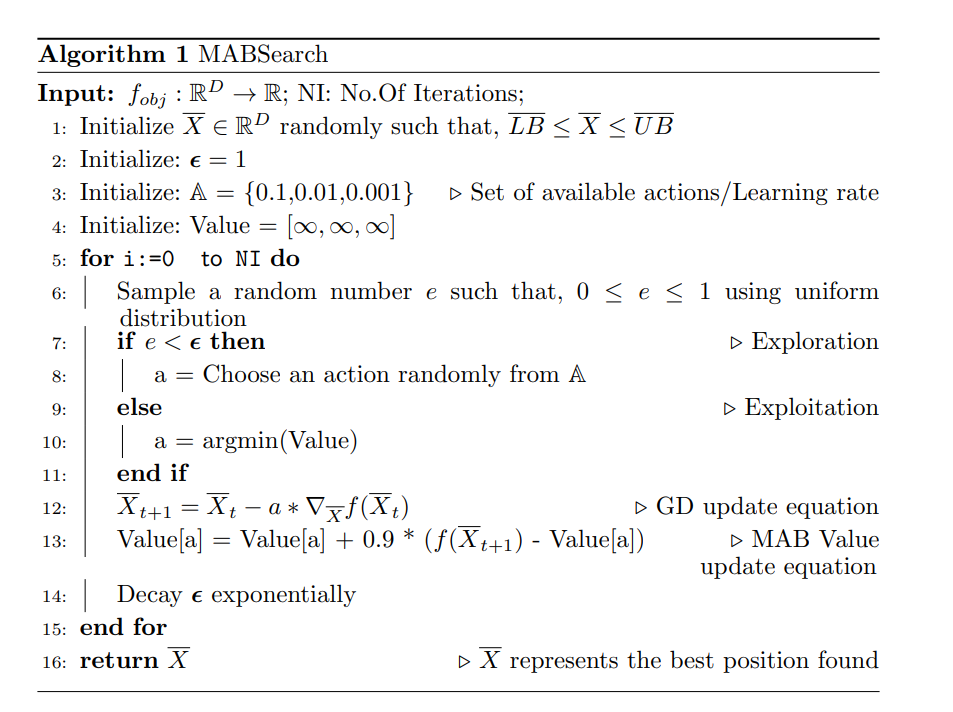

# MABSearch

### Initialization

In [5]:
#Initial Values for Exponential epsilon decay strategy
epsilon = 1
max_epsilon = 1
min_epsilon = 0.001
epsilon_decay = 0.01
#Note that these values are commonly/typically used in MAB and RL setting.

In [6]:
#The value and Action Array
v = [9999,9999,9999] #The value/reward array is initalized with positive infinity (~9999) since we are doing minimization.
act = [0.1, 0.01, 0.001] #The action value represents the three different learning rates.

In [7]:
#Intial Random location or starting point generation.
w = np.random.uniform(mrnge[0],mrnge[1], size=(dim)) #Uniformly sampled.

### The Algorithm

In [8]:
for run in range (dim*1000):
    if (random.uniform(0,1) < epsilon) :  #EXPLORATION
        l = np.random.choice([0,1,2]) #Choose an action/learning rate randomly
        for d in range (dim):
            w[d] = w[d] - act[l] * derivative(w,d)   
            w[d] = is_in_fsble_rgn(w[d])
        v[l] = v[l] +   (f(w) - v[l])* 0.9 #MAB Update Equation. 0.9 indicate high value is given for recent values. 
    
    else:                                 #EXPLOITATION
        l = np.argmin(v) #Choose the action/learning rate with the best value/reward
        for d in range (dim):
            w[d] = w[d] - act[l] * derivative(w,d)
            w[d] = is_in_fsble_rgn(w[d])
        v[l] = v[l] +   (f(w) - v[l]) *0.9
        
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay*run) #Decay the epsilon value exponentially
print("The function value of best minima found is: ", f(w) )

The function value of best minima found is:  8.40839577002085e-09


Some Observations:
The learning rate of GD equation is difficult to tune. This is because the suitability of learning rate is heavily dependent on the nature of the objective function considered. Each objective function uniqeuly demands a particular learning rate, for optimal minimization performance. 
Note that in the MAB Update equation, different values can be tried instead of 0.9. But, unlike the learning rate in GD, this parameter is not decieving to tune. Its just the importance given to the recent/new information. Higher the value, the quicker and the more importance is given to the recent value. So typically in MAB and RL setting, no dedicated efforts are taken to tune this parameter.

For more information on this MAB Update equation, we suggest the reader to refer: Reinforcement Learning - An Introduction by Richard S. Sutton and Andrew G. Barto (Second Edition).
[Chapter 2, Section 2.2 and 2.4]

Some Important Figures

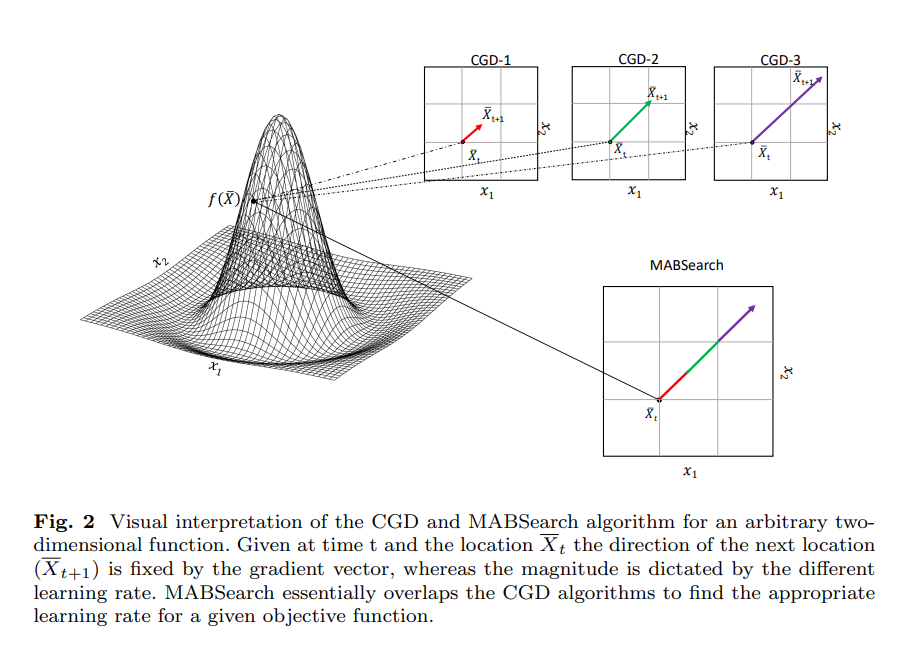

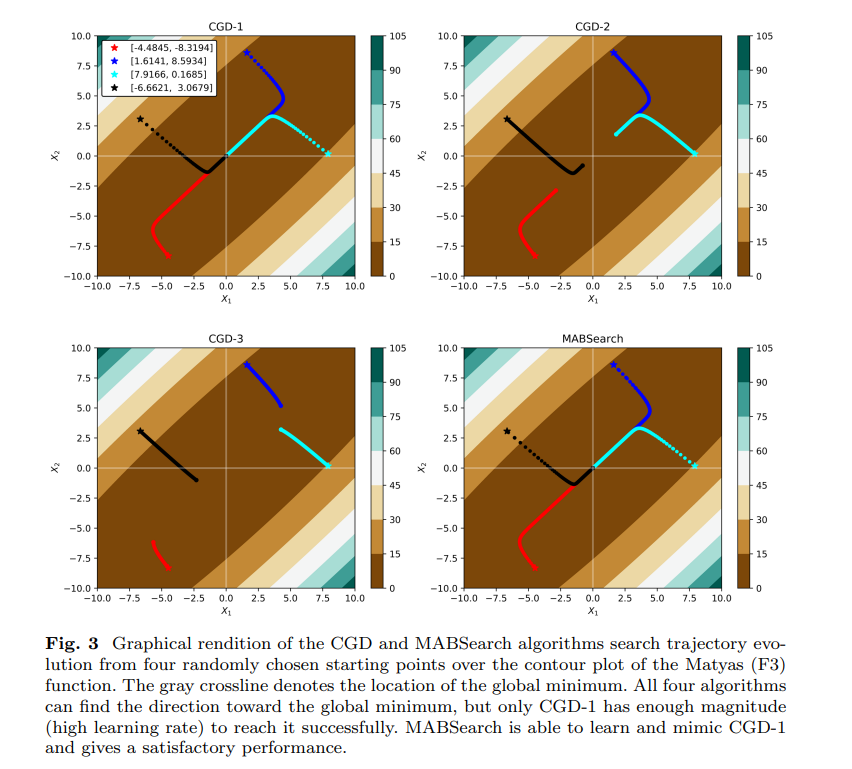